# CS 3110/5110: Data Privacy
## In-Class Exercises, week of 9/9/2024

In [1]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

adult = pd.read_csv('https://github.com/jnear/cs3110-data-privacy/raw/main/homework/adult_with_pii.csv')

## Question 1

Write a *counting query* to determine whether or not Karrie Trusslove's age is 39.

In [2]:
def karrie_query():
    return len(adult[(adult['Name'] == 'Karrie Trusslove') & (adult['Age'] == 39)])

assert karrie_query() == 1

## Question 2

Add Laplace noise to the counting query you wrote in the last question to ensure differential privacy for $\epsilon = 1.0$.

In [3]:
def dp_karrie_query():
    original_answer = karrie_query()
    epsilon = 1
    # to get differential privacy, add some random noise to the true answer
    return original_answer + np.random.laplace(loc=0, scale=1/epsilon)

In [4]:
np.mean([dp_karrie_query() for _ in range(100)])

0.9988264036616056

In [5]:
# TEST CASE 
epsilon = 1

q2_runs = [dp_karrie_query() for _ in range(100)]
noise_runs = [np.random.laplace(loc=1, scale=1/epsilon) for _ in range(100)]

assert stats.wasserstein_distance(q2_runs, noise_runs) < 1

## Question 3

In 2-4 sentences, describe how `dp_karrie_query` protects Karrie's privacy.

The query specifically targets Karrie. To achieve differential privacy, we add random noise to the result. The random noise prevents n adversary from knowing whether the answer to the original query was 0 or 1, and thus protects Karrie's privacy.

## Question 4

Implement a function to construct an *empirical distribution* over random samples from the Laplace distribution with location 0 and scale `scale`. Use 1000 samples.

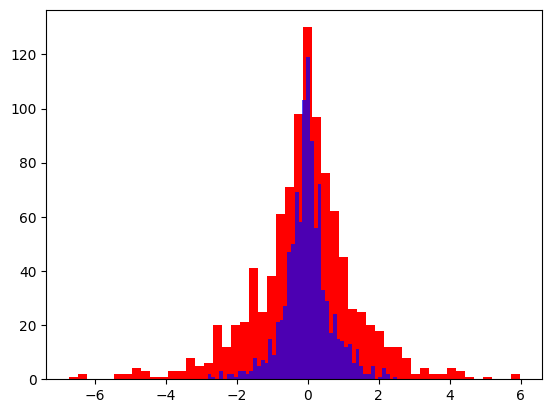

In [6]:
def empirical_dist_lap(scale):
    return [np.random.laplace(loc=0, scale=scale) for _ in range(1000)]

epsilon1 = 1.0
epsilon2 = 2.0

plt.hist(empirical_dist_lap(1/epsilon1), bins=50, color='red');
plt.hist(empirical_dist_lap(1/epsilon2), bins=50, alpha=.7, color='blue');

In [7]:
# PLACEHOLDER for test cases


## Question 5

Consider the program below.

In [15]:
counting_query = lambda: 1

result_1 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon1)
result_2 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon2)
result_3 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon1)

print(result_1, result_2, result_3)

2.859692000992772 0.31771845789610464 1.448584116598388


Write a function `total_epsilon` that returns the total privacy cost for this program.

In [16]:
# The reason this is the correct total_epsilon:
# We used the laplace mechanism 3 times, with epsilon1 twice and epsilon2 once. 
# By sequential composition, the total privacy cost is epsilon1 + epsilon2 + epsilon1. 
# we returned all 3 noisy answers in a tuple. 
# By post-processing, the resulting tuple satisfies differential privacy
# with the above total privacy cost.
def total_epsilon():
    # Add the epsilons together. 
    return epsilon1 + epsilon2 + epsilon1

In [17]:
total_epsilon()


4.0